In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    BatchNormalization,
    LeakyReLU,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
)


from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!ls "content/drive/My Drive"

ls: cannot access 'content/drive/My Drive': No such file or directory


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("klu2000030172/birds-image-dataset")

print("Path to dataset files:", path)

100%|██████████| 276M/276M [00:15<00:00, 18.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/klu2000030172/birds-image-dataset/versions/1


In [5]:

# Install the Kaggle API
!pip install kaggle

# Create a Kaggle folder if it doesn't exist
!mkdir -p ~/.kaggle

In [6]:
# Copy the kaggle.json to the appropriate location
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riwaj111111","key":"4f87d63a52c5d0f05857576ffd2abe2e"}'}

In [7]:
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # Change permissions

In [8]:
!kaggle datasets download puneet6060/intel-image-classification -p /content/ --unzip


Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
100% 345M/346M [00:16<00:00, 22.5MB/s]
100% 346M/346M [00:16<00:00, 22.4MB/s]


In [9]:
train_dir = "/content/seg_train/seg_train/"
test_dir = "/content/seg_test/seg_test/"

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image shape and batch size
image_shape = (150, 150)
batch_size = 8

# Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Reserve 20% of training data for validation
)

# Only rescaling for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data with augmentation
print("Training Images:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

# Load validation data (20% of training data)
print("Validating Images:")
valid_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

# Load test data (consider validation data as test data)
print("Test Images:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_shape,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Training Images:
Found 11230 images belonging to 6 classes.
Validating Images:
Found 2804 images belonging to 6 classes.
Test Images:
Found 3000 images belonging to 6 classes.


In [ ]:
# # Ensure sample size does not exceed the number of images
# sample_size = min(len(images), 16)
# indices = random.sample(range(len(images)), sample_size)

# selected_images = images[indices]
# selected_labels = labels[indices]

# # Proceed with plotting the available samples
# plt.figure(figsize=(12, 12))
# for i in range(sample_size):
#     ax = plt.subplot(4, 4, i + 1)
#     plt.imshow(selected_images[i])
#     plt.title(train_class_names[np.argmax(selected_labels[i])])
#     plt.axis("off")

# plt.tight_layout()
# plt.show()


In [11]:
# Extract class names from the datasets using class_indices
train_class_names = list(train_data.class_indices.keys())
valid_class_names = list(valid_data.class_indices.keys())
test_class_names = list(test_data.class_indices.keys())

# Print class names
print("Training Class Names:", train_class_names)
print("Validation Class Names:", valid_class_names)
print("Test Class Names:", test_class_names)

# Print the number of classes
print("Number of Training Classes:", len(train_class_names))
print("Number of Validation Classes:", len(valid_class_names))
print("Number of Test Classes:", len(test_class_names))

Training Class Names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Validation Class Names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Test Class Names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Number of Training Classes: 6
Number of Validation Classes: 6
Number of Test Classes: 6


In [12]:
class_names = train_class_names

In [13]:

# Model definition
model = Sequential(
    [
        Conv2D(16, kernel_size=(2,2),input_shape =  (150,150,3)),
        BatchNormalization(),
        LeakyReLU(),

        Conv2D(32, kernel_size=(3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Conv2D(64, kernel_size=(3,3)),
        BatchNormalization(),
        LeakyReLU(),

        Conv2D(128, kernel_size=(3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),

        Dense(64),
        Dropout(0.2),
        BatchNormalization(),
        LeakyReLU(),

        Dense(32),
        Dropout(0.2),
        BatchNormalization(),
        LeakyReLU(),

        Dense(16),
        Dropout(0.2),
        BatchNormalization(),
        LeakyReLU(),

        Dense(6, activation="softmax", name="output")
    ]
)

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 149, 149, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 149, 149, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 147, 147, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 147, 147, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 27, 27, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 27, 27, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 27, 27, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 25, 25, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 64)                  │              

 Total params: 306,182 (1.17 MB)

 Trainable params: 305,478 (1.17 MB)

 Non-trainable params: 704 (2.75 KB)

In [14]:
# Compile the Model
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)
optimizer = Adam(learning_rate=1e-4)
model.compile(loss=loss_fn, optimizer=optimizer, metrics=['accuracy'])

# Callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
callbacks = [early_stopping, reduce_lr]

In [15]:

epochs = 25

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    patience=10,               # Number of epochs with no improvement after which training will stop
    restore_best_weights=True  # Restore model weights from the epoch with the best validation loss
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with early stopping
history = model.fit(
    train_data,
    epochs=25,
    batch_size = 8,
    validation_data=valid_data,
    callbacks= [early_stopping, reduce_lr]
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1404/1404 ━━━━━━━━━━━━━━━━━━━━ 128s 80ms/step - accuracy: 0.3389 - loss: 1.7029 - val_accuracy: 0.6045 - val_loss: 1.2611 - learning_rate: 1.0000e-04
Epoch 2/25
1404/1404 ━━━━━━━━━━━━━━━━━━━━ 124s 75ms/step - accuracy: 0.5000 - loss: 1.4190 - val_accuracy: 0.6131 - val_loss: 1.2133 - learning_rate: 1.0000e-04
Epoch 3/25
1404/1404 ━━━━━━━━━━━━━━━━━━━━ 105s 74ms/step - accuracy: 0.5554 - loss: 1.3137 - val_accuracy: 0.6787 - val_loss: 1.1044 - learning_rate: 1.0000e-04
Epoch 4/25
1404/1404 ━━━━━━━━━━━━━━━━━━━━ 140s 73ms/step - accuracy: 0.5916 - loss: 1.2572 - val_accuracy: 0.6969 - val_loss: 1.0647 - learning_rate: 1.0000e-04
Epoch 5/25
1404/1404 ━━━━━━━━━━━━━━━━━━━━ 103s 73ms/step - accuracy: 0.6068 - loss: 1.2253 - val_accuracy: 0.7097 - val_loss: 1.0120 - learning_rate: 1.0000e-04
Epoch 6/25
1404/1404 ━━━━━━━━━━━━━━━━━━━━ 140s 72ms/step - accuracy: 0.6457 - loss: 1.1763 - val_accuracy: 0.7536 - val_loss: 0.9596 - learning_rate: 1.0000e-04
Epoch 7/25
1404/1404 ━━━━━━━━━━━━━━━━━━━━ 142

# Testing and Evaluation


In [16]:
Y_pred = model.predict(test_data)
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8427 - loss: 0.8002
Test loss: 0.8006528615951538
Test accuracy: 0.840666651725769


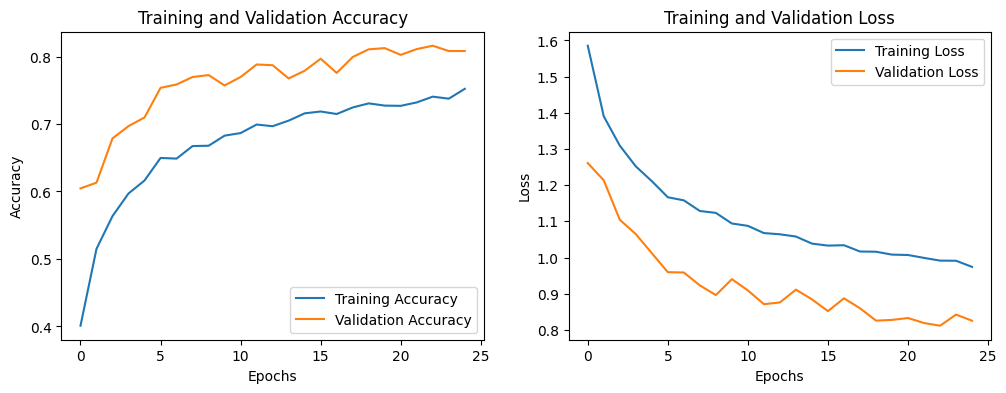

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# Define class names (replace these with actual class names if available)
CLASS_NAMES = class_names

# Function to plot accuracy and loss curves
def plot_training_curves(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

# Call the function to plot curves
plot_training_curves(history)

351/351 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step
Classification Report:
               precision    recall  f1-score   support

   buildings       0.85      0.74      0.79       438
      forest       0.91      0.97      0.94       454
     glacier       0.74      0.85      0.79       480
    mountain       0.82      0.72      0.77       502
         sea       0.84      0.82      0.83       454
      street       0.79      0.84      0.81       476

    accuracy                           0.82      2804
   macro avg       0.82      0.82      0.82      2804
weighted avg       0.82      0.82      0.82      2804

Precision: 0.8231, Recall: 0.8210, F1 Score: 0.8198


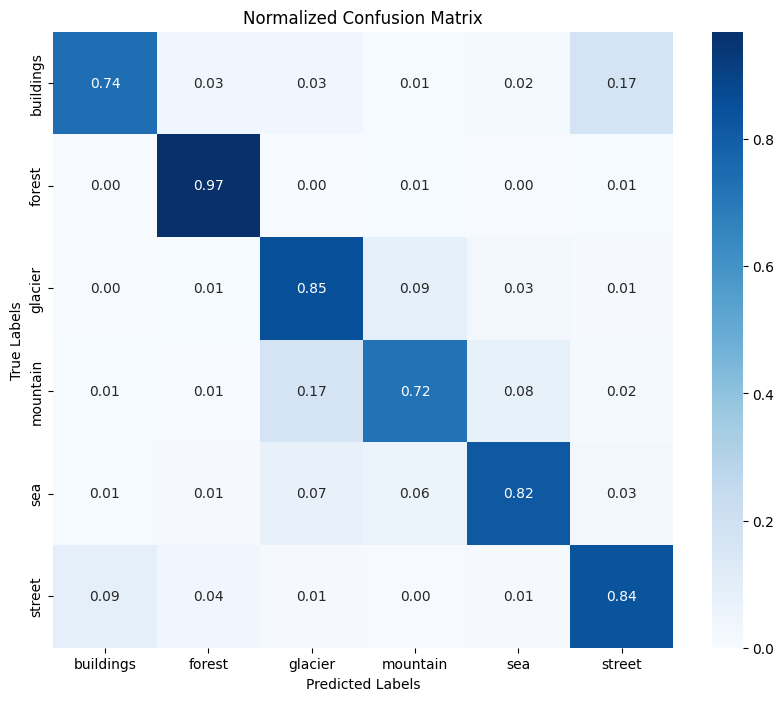

In [18]:

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict on validation data
Y_pred = model.predict(valid_data)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = valid_data.classes  # Actual class labels from validation data

# Generate a classification report
CLASS_NAMES = list(valid_data.class_indices.keys())  # Extract class names from validation data generator
print("Classification Report:\n", classification_report(Y_true, Y_pred_classes, target_names=class_names))

# Calculate precision, recall, and F1-score
precision = precision_score(Y_true, Y_pred_classes, average='weighted')
recall = recall_score(Y_true, Y_pred_classes, average='weighted')
f1 = f1_score(Y_true, Y_pred_classes, average='weighted')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Calculate normalized confusion matrix
conf_matrix = confusion_matrix(Y_true, Y_pred_classes, normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names, fmt='.2f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()



# GUI Implementation


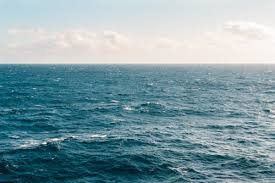

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [19]:
import io
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image
import numpy as np
import tensorflow as tf

# Load your pre-trained model
model = model  # Assuming your model is already loaded

# Define class names
CLASS_NAMES = class_names  # Use your actual class names here

# Function to preprocess and predict the image
def predict_image(img):
    img_resized = img.resize((150, 150))
    img_array = np.array(img_resized) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict and get confidence score
    predictions = model.predict(img_array)
    confidence_scores = predictions[0]
    pred_index = np.argmax(confidence_scores)
    pred_class = class_names[pred_index]
    pred_confidence = confidence_scores[pred_index]

    result_label.value = f"Prediction: {pred_class}\nConfidence: {pred_confidence:.2f}"

# Define widgets
upload_button = widgets.FileUpload(accept='image/*', multiple=False)
result_label = widgets.Label()

# Display the uploaded image and perform prediction
def on_upload_change(change):
    # Clear previous output (remove old image and result)
    clear_output(wait=True)

    # Re-display the upload button and result label
    display(widgets.VBox([upload_button, result_label]))

    for name, file_info in upload_button.value.items():
        image_data = io.BytesIO(file_info['content'])  # Convert binary content to a BytesIO object
        image = Image.open(image_data)  # Open image with PIL
        display(image)  # Display the uploaded image in the notebook
        predict_image(image)

upload_button.observe(on_upload_change, names='value')

# Display widgets
display(widgets.VBox([upload_button, result_label]))

In [20]:
model.save('intel_image.keras')


In [21]:
class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']